In [2]:
import json
import numpy as np
import h5py
from scipy.spatial.distance import squareform
import math
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [16]:
# load similarity
with h5py.File("W16_similarity (1).h5", "r") as f:
    gt_labels = f["sim"][:].flatten() #similarity labels in condensed form (shape=(1,n * (n-1) / 2))
    gt_labels = squareform(gt_labels) #similarity labels in matrix form (shape=(n, n))

In [18]:
print(gt_labels.shape)
print(gt_labels)

(40752, 40752)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [5]:
with h5py.File("Sequence_00_similarity.h5", "r") as f:
    gt_labels = f["sim"][:].flatten() #similarity labels in condensed form (shape=(1,n * (n-1) / 2))
    gt_labels = squareform(gt_labels) #similarity labels in matrix form (shape=(n, n))

print(gt_labels.shape)
[n,m] = gt_labels.shape

(1260, 1260)


In [6]:
#" Evaluate Classification "
# Input: Similarity matrix of classification and gound truth

def PR(gt_labels,ts_labels):

#" Evaluate Classification "
# Input: Similarity matrix of classification and gound truth

    [n,m] = gt_labels.shape
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range (1,n):
        for j in range (1,m):
            if ts_labels[i][j] == True:
                if gt_labels[i][j] == True:
                    TP+=1
                elif gt_labels[i][j] == False:
                    FP+=1
            elif ts_labels[i][j] == False:
                if gt_labels[i][j] == False:
                    TN+=1
                elif gt_labels[i][j] == True:
                    FN+=1
            
            
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1 = 2*(Precision*Recall)/(Precision+Recall)

    print(Precision)
    print(Recall)
    print(F1)
    
    return Precision, Recall, F1

In [7]:
# Test function: PR
ts_labels = gt_labels
[x,y,z] = PR(gt_labels, ts_labels)

1.0
1.0
1.0


In [8]:
def aveP(Precision, Recall):
# Precision and Recall should be a array (by varying threshold)
    n = len(Precision)
    AP = 0
    for i in range(0,n):
        Recall = B[i]
        Precision = A[i]
        if i !=0:
            AP+=(Recall-pre)*Precision
        else:
            AP+=(Recall-0)*Precision
        pre = Recall
        
    return AP

Averaged Precision:  0.3500000000000001


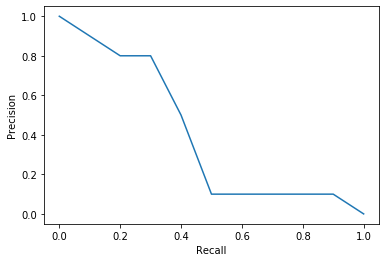

In [9]:
# Test function: aveP
A = np.array([1,0.9,0.8,0.8,0.5,0.1,0.1,0.1,0.1,0.1,0]) #Precision
B = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]) #Recall
ans = aveP(A,B)
print("Averaged Precision: ",ans)

# Plot Precision-Recall curve
plt.figure(1)
plt.plot(B,A)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()
#plt.savefig('pr.png')

In [10]:
# load pose
with open("Sequence_00.json", "r") as f:
    data = json.load(f)
im_paths = data["im_paths"] #list of image paths, length = n
poses = np.array(data["poses"]) #pose matrix of shape = (n, 7)

In [11]:
print(poses[1][:])
# camera pose p = [t,q]
print(poses.shape)


[ 4.36837452  4.77739597  0.58763258  0.66050396  0.28058243 -0.26943548
  0.64219354]
(1260, 7)


In [12]:
def quaternion(qi):
# Compute delta phi from quaterions
# Input: pose-liked quaternion
    
    [n,m] = qi.shape
    phi = np.zeros((n,n))
    for i in range (0,n):
        for j in range (0,n):
            InProd = 0
            if i == j:
                phi[i][j] = 0 ;
            else:
                for k in range (3,7):
                    InProd += qi[i][k]*qi[j][k]
                
                distance = 1 - InProd**2
                phi[i][j] = math.acos(-2*distance+1)*180/math.pi  
    return phi

In [13]:
# Test function: quaternion
Q = quaternion(poses)

In [14]:
print(Q.shape)
print(Q[0][6])

(1260, 1260)
0.0031224760918671197


In [20]:
for i in range (0,1):
    for j in range(0,1260):
        if gt_labels[i][j] == True:
            print(i,j)

0 6
0 12
0 18
0 24
0 30
0 36
0 42
0 48
0 54
0 60
0 66
0 72
0 78
0 84
0 90
0 96
0 102
0 108
0 114
0 120
0 126
0 132
0 138
0 144
0 150
0 156
0 162
0 168
0 174
0 180
0 186
0 192
0 198
0 204
0 210
0 216
0 222
0 228
0 1012
0 1018
0 1024
0 1030
0 1036
0 1037
0 1043
0 1049
0 1055
0 1061
0 1062
0 1068
0 1074
0 1080
0 1086
0 1092
0 1098
0 1104
0 1110
0 1116
0 1122
0 1128
0 1134
0 1140
0 1146
0 1152
0 1158
0 1164
0 1170
0 1176
0 1182
0 1188
0 1194
0 1200
0 1206
0 1212
0 1218
0 1224
0 1230
0 1236
0 1242
0 1248
0 1254
